In [ ]:
import sys
import os

# Add the path to the code directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath("."), '../code')))

from run import run_instance, print_results
from QAOA import circuit_plot

In [ ]:
# Example Single Usage
# If more than ships than time slots are being used, more iterations will be needed as more infeasible solutions will be generated
# Currently infeasible reasons are for bug fixing purposes, 
number_ships=  8
number_time_slots = 8
NUM_READS = 10 # Number of of iterations of the simulated annealer

results = run_instance(number_ships, number_time_slots, NUM_READS)
print_results(number_ships, number_time_slots, results)

[6.5 6.5 6.5 5.7 5.  6.1 4. ] [321.18 340.32 284.95 172.38 177.99 236.98 226.68]


KeyError: 56

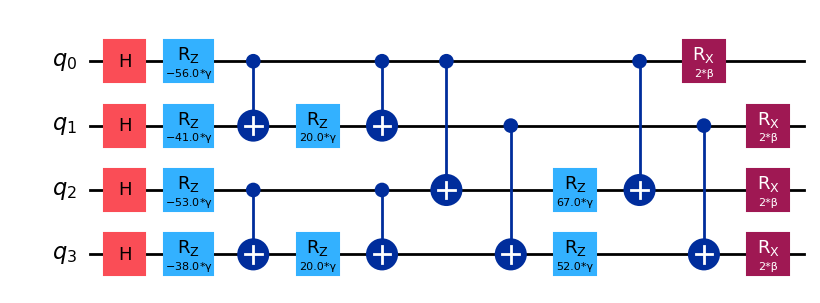

In [ ]:
## Now we generate the QAOA circuit for given amount of ships and time slots
number_ships=  2
number_time_slots = 2
circuit_plot(number_ships, number_time_slots)